# Probability

Probability is a very huge topic to dicuss in a single blog. Here I am just going to name few things to remember while dicussing models using probablistic approach.
1. Sample space : All the possible outcomes of experiment, like 3 faced die {A,B,C}
2. Event space : All possible events that can occur, like {{},{A},{B},{C},{A,B},{B,C},{A,C},{A,B,C}} where an event {A,B} represents die showing A or B
3. Probability mass function (pmf) 
$$
p_{x}(a) = P[X=a] = P[X^{-1}(a)]
$$
4. Probability density function (pdf)
$$
P([a,b])=\int_{E}^{}dP = \int_{a}^{b}p(x)dx
$$
5. Cumulative density function (cdf)
$$
P_X(x):=P[X\leq x] = \int_{-\infty}^{x}p_X(x^\prime)dx^\prime
$$
6. Few operations to remember when dealing with probability
    1. Compliment rule (where both sets are disjoint)
        $$
            P[E_1 \cup E_2] = P[E_1] + P[E_2]
        $$
        If they are mutually exclusive,
        $$
            P[E^c] = 1 - P[E]
        $$
    2. Addition rule
        $$
            P[E_1 \cup E_2] = P[E_1] + P[E_2] - P[E_1 \cap E_2]
        $$
    3. Conditional Probability : Consider 2 events E1 and E2. 
        If $$ P[E_1] \neq 0 $$ we define the conditional probability of E1 happening given E2
        $$
            P[E_1 | E_2] := \dfrac{P[E_1 \cap E_2]}{P[E_2]}
        $$
    4. Multiplication Rule 
        $$
            P[E_1 \cap E_2] = P[E_1|E_2]P[E_2] = P[E_2|E_1]P[E_1]
        $$
7. Bayes rule / Bayes Theorem : For 2 events E1 and E2
    $$
        P[E_1|E_2] = \dfrac{P[E_2|E_1]P[E_1]}{P[E_2]} \\
        \:\\
        P[X=k|E] = \dfrac{p(E|X=k)p(X=k)}{p(E)} = \dfrac{p(E|X=k)p(X=k)}{\sum_{k^\prime=1}^{K}p(E|X=k\prime)p(X=k\prime)}
    $$
    For discrete random variable X with K possible states, we can write Bayes rule as follows, using law of total probability:
    $$
        
    $$
    Here we can see posterior probability is defined as product of prior probability $p(X=k)$ and 
    likelihood $p(E|X=k)$ and normalization constant known as marginal likelihood $\sum_{k^\prime=1}^{K}p(E|X=k\prime)p(X=k\prime)$.


## Distributions

There are a lot of distributions defined and each of them have there own properties and features. I am not going to discuss all of them here but just a few points and mentions of them.

1. Bernoulli Distribution : Used to represent binary data
2. Categorical Distribution : Used to represent data with K categories
3. Poisson Distribution : Used when we need a function with mean and variance represented as 1 variable
4. Negative Binomial Distribution : Generic form of poisson distribution here we use 2 separate variables to represent poisson distribution
5. Gaussian(Normal) Distribution : Most widely used distribution in Bayesian inference as it can be easily corelated with. Here we use 2 vaiables namely mean and covariance to represent this distribution
6. Half-normal Distribution : It is a folded-over distribution form of gaussian (non-negative reals used)
7. Student t-distribution : It is insensitive to outliers (sometimes used to replace gaussian)
8. Cauchy Distribution : It is noteable for having heavy tails that the integral that defines the mean does not converge.
9. Laplace Distribution : It is a heavy tail distribution
10. Sub Gaussian : Broad distribution & heavier tail than gaussian
11. Super Gaussian : Narrow distribution & lighter tail than gaussian
12. Gamma Distribution : Distribution changes based on 2 parameters a and b. It is very flexible.
13. Exponential Distribution : Special case of Gamma distribution
14. Chi-square Distribution : Special case of Gamma distribution
15. Inverse Gamma Distribution 
16. Pareto Distribution : In this the distribution is dependent on value m, it gives m (if x >= m) after it decreases rapidly.
17. Beta Distribution : It is represented using 2 variables a and b. If a=b=1 then uniform distribution, if a<1 and b<1 bimodal with spikes at 0 and 1. If a>1 and b>1 unimodal distribution

### Multivariate continuous distribution
These are the mostly used distributions as they can represent multiple variables using the statistics of the data provided.
1. Multivariate Student distribution : A distribution which is comapred with gaussian most of the time. As this is less sensitive to outliers than gaussian. 
2. Circular normal (von Mises Fisher) distribution : when data lives inside a unit sphere we use this distribution. 
3. Matrix Normal distribution : when we need to define pdf over matrices.
4. Wishart distribution : generalization of gamma distribution
5. Inverse Wishart distribution : multidimensional generalization of the inverse gamma
6. Dirichlet distribution : generalization of beta distribution. when we know that the outcome will be unpredictable or may say outcome is equally likely or unbiased. Then we use 'peaky symmetric dirichlet'. But when we know the outcome will be like (like a biased die). We use flat symmetric dirichlet. It is also used to create a sparse distribution.

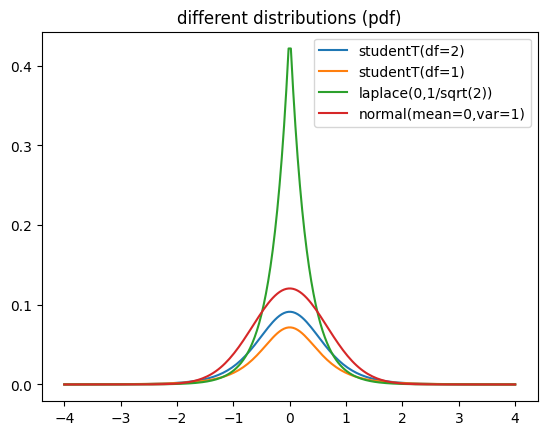

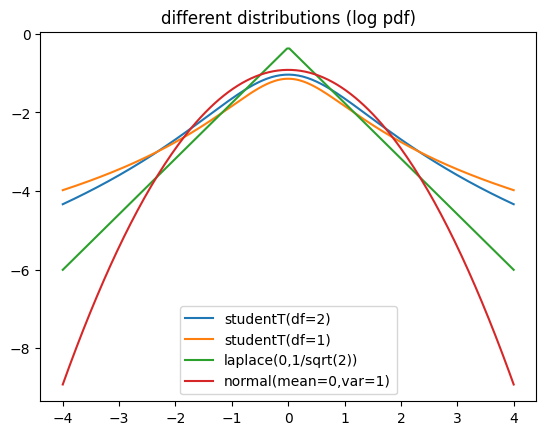

In [23]:
# Some code to show distributions
import torch.distributions.studentT as studentT
import torch.distributions.laplace as laplace
import torch.distributions.normal as normal
import torch.distributions.uniform as uniform
import torch as torch
import matplotlib.pyplot as plt
import math

d1 = studentT.StudentT(torch.tensor([2.0]))
d2 = studentT.StudentT(torch.tensor([1.0]))
d3 = laplace.Laplace(torch.tensor([0.0]),torch.tensor([1/math.sqrt(2)]))
d4 = normal.Normal(torch.tensor([0.0]),torch.tensor([1.0]))
x = torch.linspace(-4.0, 4.0, 200)
# pdf
plt.plot(x,10**d1.log_prob(x))
plt.plot(x,10**d2.log_prob(x))
plt.plot(x,10**d3.log_prob(x))
plt.plot(x,10**d4.log_prob(x))
plt.title('different distributions (pdf)')
plt.legend(['studentT(df=2)','studentT(df=1)','laplace(0,1/sqrt(2))','normal(mean=0,var=1)'])
plt.show()

# log pdf
plt.plot(x,d1.log_prob(x))
plt.plot(x,d2.log_prob(x))
plt.plot(x,d3.log_prob(x))
plt.plot(x,d4.log_prob(x))
plt.title('different distributions (log pdf)')
plt.legend(['studentT(df=2)','studentT(df=1)','laplace(0,1/sqrt(2))','normal(mean=0,var=1)'])
plt.show()


### Gaussian distribution

Most widely used multivariate distribution. As it seems reasonable in many cases. It is given by
$$
N(x|\mu,\Sigma) := \dfrac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp[-\dfrac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)]
$$
where $\mu = E[x] \in R^D$ is the mean vector, and $\Sigma = Cov[x]$ is the DxD covariance matrix.

The normalization constant $Z=(2\pi)^{D/2}|\Sigma|^{1/2}$ ensures it integrates to 1.

#### Few points to remember about gaussian
1. Full covariance matrix : It has D(D+1)/2 parameters, example with D = 3, as you can see the symmertic form of the matrix with parameters=6
$$
\begin{pmatrix}
a & b & c \\
b & d & e \\
c & e & f
\end{pmatrix}
$$
2. Diagonal covariance matrix : has D parameters, example with D=3 then parameters=3,
$$
\begin{pmatrix}
a & 0 & 0 \\
0 & b & 0 \\
0 & 0 & c
\end{pmatrix}
$$
3. Sperical covariance matrix : Also called isotropic covariance matrix. Only 1 parameter $\Sigma=\sigma^2I_D$, shown below
$$
\begin{pmatrix}
\sigma^2 & 0 & 0 \\
0 & \sigma^2 & 0 \\
0 & 0 & \sigma^2
\end{pmatrix}
$$
4. Marginal and conditionals for n feature vectors, please see some textbook for it.
5. Product of gaussians is also a gaussian.
6. It also has a canonical form with canonical parameters as 
    $$
    \Lambda := \Sigma^{-1} \quad,\quad \eta:=\Sigma^{-1}\mu
    $$
    Here $\Lambda = \Sigma^{-1}$ is also know as precision matrix

In [24]:
# calculate covariance & correlation matrix using dataset
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = torch.tensor(iris.data)
y = torch.tensor(iris.target)
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

D = df_iris.shape[0]
diffs = df_iris-df_iris.mean(dim=0)
squares = (diffs)**2
variance_calc = torch.sum(squares,dim=0)/(D-1)
variance = torch.var(df_iris,dim=0)
cov_matrix_calc = torch.matmul(diffs.T,diffs)/(D-1)
print('----Covariance matrix(calulated & direct fn)-----')
print(cov_matrix_calc)
print(torch.cov(df_iris.T))
variance_from_cov_matrix = torch.unsqueeze(torch.diag(cov_matrix_calc),1)
corr_matrix_calc = cov_matrix_calc/torch.sqrt(variance_from_cov_matrix*variance_from_cov_matrix.T)
print('----Correlation matrix(calulated & direct fn)-----')
print(corr_matrix_calc)
print(torch.corrcoef(df_iris.T))

----Covariance matrix(calulated & direct fn)-----
tensor([[ 0.6857, -0.0424,  1.2743,  0.5163],
        [-0.0424,  0.1900, -0.3297, -0.1216],
        [ 1.2743, -0.3297,  3.1163,  1.2956],
        [ 0.5163, -0.1216,  1.2956,  0.5810]], dtype=torch.float64)
tensor([[ 0.6857, -0.0424,  1.2743,  0.5163],
        [-0.0424,  0.1900, -0.3297, -0.1216],
        [ 1.2743, -0.3297,  3.1163,  1.2956],
        [ 0.5163, -0.1216,  1.2956,  0.5810]], dtype=torch.float64)
----Correlation matrix(calulated & direct fn)-----
tensor([[ 1.0000, -0.1176,  0.8718,  0.8179],
        [-0.1176,  1.0000, -0.4284, -0.3661],
        [ 0.8718, -0.4284,  1.0000,  0.9629],
        [ 0.8179, -0.3661,  0.9629,  1.0000]], dtype=torch.float64)
tensor([[ 1.0000, -0.1176,  0.8718,  0.8179],
        [-0.1176,  1.0000, -0.4284, -0.3661],
        [ 0.8718, -0.4284,  1.0000,  0.9629],
        [ 0.8179, -0.3661,  0.9629,  1.0000]], dtype=torch.float64)


#### Linear gaussian systems
If we have 2 random variables $y\in R^D$ and $z\in R^L$, which are jointly gaussian then the joint distribution is given by
$$
p(z) = N(z|\breve \mu,\breve \Sigma)\\
\quad \\
p(y|z) = N(y|Wz+b,\Omega)
$$
Where W is a matrix of size DxL,
Posterior is given by p(z|y) for a linear gaussian system as follows,
$$
p(z|y) = N(z|\hat \mu, \hat \Sigma)\\
\quad \\
\hat \mu = \breve \mu + \breve \Sigma W^T(\Omega + W \breve \Sigma W^T)^{-1}(y-(W \breve \mu + b))\\
\quad \\
\hat \Sigma = \breve \Sigma - \breve \Sigma W^T(\Omega+W\breve \Sigma W^T)^{-1}W\breve\Sigma
$$
To simplify this, we take $S=W\breve\Sigma W^T+\Omega$, $C=\breve\Sigma W^T$, and $m=W\breve\mu + b$ using these we define Kalman gain matrix,
$$
K=CS^{-1}
$$
So the posterior becomes,
$$
\hat \mu = \breve \mu + K(y-m)\\
\quad \\
\hat \Sigma = \breve \Sigma - KC^T
$$
Please refer some textbook for detail info.


## The exponential family

It is one of the family of distributions which impact statistics and machine learning highly. Few important points on it,

1. It has maximum entropy(least assumptions) when subjected to user-constraints. 
2. It is used heavily in GLMs(Generalized linear models) and Variational inference. 
3. It is also a set of distributions which have finite sized sufficient statistics when subjected to certain regularity conditions. 
4. All the members of the exponential family have conjugate priors.

It is defined using a parameter $\eta \in R^K$, Here $p(x|\eta)$ is in the exponential family if its density can be written as,
$$
p(x|\eta) := \dfrac{1}{Z(\eta)}h(x)exp[\eta^T T(x)] = h(x)exp[\eta^T T(x)-A(\eta)]
$$
Where,

$Z(\eta)$ is the normalization constant/partition function

$\eta$ is the natural parameter/cannonical parameter

$h(x)$ is the scaling constant/ base measure (often default value : 1)

$A(\eta) = log\,Z(\eta)$ is the log partition function

$T(x) \in R^K$ is sufficient statistics

A is a convex function over $\Omega := \{ \eta \in R^K : A(\eta) < \infty\}$

If $\eta = f(\phi)$ where $\phi$ is some other function with possibily smaller set of parameters. So using this the distribution becomes,
$$
p(x|\phi) = h(x)exp[f(\phi)^T T(x)-A(f(\phi))]
$$
$\phi \to \eta$ : nonlinear (curved exponential family)

If $\eta = f(\phi) = \phi$ then above equation is called canonical form

T(x) = x is the natural exponential family(NEF)

Moment parameter is given by $m=E[T(x)]$

### Bernouli Distribution

This can be represented in exponential family form as,
$$
Ber(x|\mu) = \mu^x(1-\mu)^{1-x} \\
\quad \\
... = exp[x log(\mu) + (1-x)log(1-\mu)] \\
\quad \\
... = exp[T(x)^T\eta]
$$
where $T(x) = [I(x=1),I(x=0)]$, $\eta = [log(\mu),log(1-\mu)]$ and $\mu$ is the mean parameter. If $\eta$ is not uniquely identified, then we use minimal representation. So the equation becomes,
$$
Ber(x|\mu) = exp[x\:log(\dfrac{\mu}{1-\mu})+log(1-\mu)]\\
\quad \\
\eta = log\dfrac{\mu}{1-\mu}\\
\quad \\
T(x) = x \\
\quad \\
A(\eta) = -log(1-\mu) = log(1+e^\eta)\\
\quad \\
h(x) = 1
$$
Mean parameter $\mu$ using canonical parameter $\eta$
$$
\mu=\sigma(\eta)=\dfrac{1}{1+e^{-\eta}}
$$
This is **logistic sigmoid function**

### Categorical distribution
If we have K categories, this is defined as
$$
Cat(x|\mu) = \prod_{k=1}^{K}\mu_k^{x_k} = exp[\sum_{k=1}^{K}x_klog\mu_k]\\
... = exp[\sum_{k=1}^{K-1}x_k log(\dfrac{\mu_k}{\mu_K})+log \mu_K]
$$
So, the exponential family parameters can be written as,
$$
\eta=[log\dfrac{\mu_1}{\mu_K},...,log\dfrac{\mu_{K-1}}{\mu_K}]\\
\quad \\
A(\eta)=-log(\mu_K)\\
\quad \\
T(x)=[I(x=1),...,I(x=K-1)]\\
\quad \\
h(x)=1
$$
So, the mean parameters using canonical parameter given by,
$$
\mu_k = \dfrac{e^{\eta_k}}{1+\sum_{j=1}^{K-1}e^{\eta_j}} \\ 
\quad \\
\eta_k = 0 \\
\mu_k = \dfrac{e^{\eta_k}}{\sum_{j=1}^{K}e^{\eta_j}}
$$
for k=1:K, hence $\mu=softmax(\eta)$ 

Similarly this can be defined for Univariate Gaussian, Multivariate Gaussians. Please refer some textbook.

### MLE for the exponential family

The likelihood of the exponential family is defined by,
$$
p(D|\eta) = [\prod_{n=1}^{N}h(x_n)]exp(\eta^T[\sum_{n=1}^{N}T(x_n)]-N A(\eta)) \propto exp[\eta^T T(D)-N A(\eta)]\\
T(D) = [\sum_{n=1}^{N}T_1(x_n),...,\sum_{n=1}^{N}T_K(x_n)]
$$
We can represent log likelihood is given by,
$$
log\:p(D|\eta) = \eta^T T(D)- N A(\eta) + const
$$
To derive the maximum we get,
$$
\nabla_\eta log\:p(D|\eta) = \nabla_\eta \eta^T T(D) - N\nabla_\eta A(\eta) = T(D) - N\:E[T(x)]
$$
Since $\nabla_\eta A(\eta) = E[T(x)]$, for single data this becomes,
$$
\nabla_\eta log\:p(D|\eta) = T(x) - E[T(x)]
$$
If we equate gradient to zero, this becomes,
$$
E[T(x)] = \dfrac{1}{N}\sum_{n=1}^{N}T(x_n)
$$
This is called moment matching.
